In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [2]:
X, y = make_regression(n_samples=10, n_features=3)

In [3]:
df = pd.DataFrame(X)
df['y_true'] = y
df

,0,1,2,y_true
0,-0.993096,0.541556,0.479352,-31.653275
1,-0.339258,-0.454686,1.167282,-14.357695
2,-0.148033,0.002323,-0.524491,-7.168727
3,-0.391574,-1.952074,0.493702,-33.152186
4,-0.358109,0.578456,-0.265237,-8.833939
5,1.000798,-0.642100,0.444969,33.543464
6,-0.149276,-1.553098,0.267097,-20.457707
7,-1.343118,0.301065,0.148183,-48.499770
8,-0.796142,-0.341284,-0.573417,-35.768986
9,1.224506,-1.462095,-0.866859,30.359958


In [4]:
df['y_pred_0'] = df['y_true'].mean()

In [5]:
df

,0,1,2,y_true,y_pred_0
0,-0.993096,0.541556,0.479352,-31.653275,-13.598886
1,-0.339258,-0.454686,1.167282,-14.357695,-13.598886
2,-0.148033,0.002323,-0.524491,-7.168727,-13.598886
3,-0.391574,-1.952074,0.493702,-33.152186,-13.598886
4,-0.358109,0.578456,-0.265237,-8.833939,-13.598886
5,1.000798,-0.642100,0.444969,33.543464,-13.598886
6,-0.149276,-1.553098,0.267097,-20.457707,-13.598886
7,-1.343118,0.301065,0.148183,-48.499770,-13.598886
8,-0.796142,-0.341284,-0.573417,-35.768986,-13.598886
9,1.224506,-1.462095,-0.866859,30.359958,-13.598886


In [6]:
mean_absolute_error(df['y_true'], df['y_pred_0'])

20.459260192882034

In [7]:
df['residual_0'] = df['y_true'] - df['y_pred_0']
df

,0,1,2,y_true,y_pred_0,residual_0
0,-0.993096,0.541556,0.479352,-31.653275,-13.598886,-18.054388
1,-0.339258,-0.454686,1.167282,-14.357695,-13.598886,-0.758808
2,-0.148033,0.002323,-0.524491,-7.168727,-13.598886,6.430159
3,-0.391574,-1.952074,0.493702,-33.152186,-13.598886,-19.553300
4,-0.358109,0.578456,-0.265237,-8.833939,-13.598886,4.764947
5,1.000798,-0.642100,0.444969,33.543464,-13.598886,47.142350
6,-0.149276,-1.553098,0.267097,-20.457707,-13.598886,-6.858821
7,-1.343118,0.301065,0.148183,-48.499770,-13.598886,-34.900884
8,-0.796142,-0.341284,-0.573417,-35.768986,-13.598886,-22.170100
9,1.224506,-1.462095,-0.866859,30.359958,-13.598886,43.958844


In [8]:
tree_1 = DecisionTreeRegressor(max_depth=1)

In [9]:
tree_1.fit(df[[0,1,2]], df['residual_0'])

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 0.426\nsquared_error = 668.433\nsamples = 10\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 186.515\nsamples = 8\nvalue = -11.388'),
 Text(0.75, 0.25, 'squared_error = 2.534\nsamples = 2\nvalue = 45.551')]

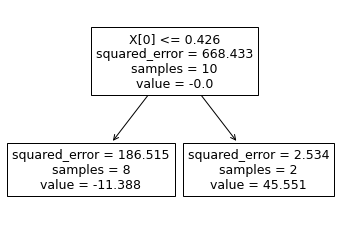

In [10]:
plot_tree(tree_1)

In [11]:
df['tree_pred_1'] = tree_1.predict(df[[0,1,2]])
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1
0,-0.993096,0.541556,0.479352,-31.653275,-13.598886,-18.054388,-11.387649
1,-0.339258,-0.454686,1.167282,-14.357695,-13.598886,-0.758808,-11.387649
2,-0.148033,0.002323,-0.524491,-7.168727,-13.598886,6.430159,-11.387649
3,-0.391574,-1.952074,0.493702,-33.152186,-13.598886,-19.553300,-11.387649
4,-0.358109,0.578456,-0.265237,-8.833939,-13.598886,4.764947,-11.387649
5,1.000798,-0.642100,0.444969,33.543464,-13.598886,47.142350,45.550597
6,-0.149276,-1.553098,0.267097,-20.457707,-13.598886,-6.858821,-11.387649
7,-1.343118,0.301065,0.148183,-48.499770,-13.598886,-34.900884,-11.387649
8,-0.796142,-0.341284,-0.573417,-35.768986,-13.598886,-22.170100,-11.387649
9,1.224506,-1.462095,-0.866859,30.359958,-13.598886,43.958844,45.550597


In [12]:
nu = 0.1

In [13]:
df['y_pred_1'] = df['y_pred_0'] + nu * df['tree_pred_1']

In [14]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1
0,-0.993096,0.541556,0.479352,-31.653275,-13.598886,-18.054388,-11.387649,-14.737651
1,-0.339258,-0.454686,1.167282,-14.357695,-13.598886,-0.758808,-11.387649,-14.737651
2,-0.148033,0.002323,-0.524491,-7.168727,-13.598886,6.430159,-11.387649,-14.737651
3,-0.391574,-1.952074,0.493702,-33.152186,-13.598886,-19.553300,-11.387649,-14.737651
4,-0.358109,0.578456,-0.265237,-8.833939,-13.598886,4.764947,-11.387649,-14.737651
5,1.000798,-0.642100,0.444969,33.543464,-13.598886,47.142350,45.550597,-9.043826
6,-0.149276,-1.553098,0.267097,-20.457707,-13.598886,-6.858821,-11.387649,-14.737651
7,-1.343118,0.301065,0.148183,-48.499770,-13.598886,-34.900884,-11.387649,-14.737651
8,-0.796142,-0.341284,-0.573417,-35.768986,-13.598886,-22.170100,-11.387649,-14.737651
9,1.224506,-1.462095,-0.866859,30.359958,-13.598886,43.958844,45.550597,-9.043826


In [15]:
mean_absolute_error(df['y_true'], df['y_pred_0'])

20.459260192882034

In [16]:
mean_absolute_error(df['y_true'], df['y_pred_1'])

19.168733570451415

Step II

In [17]:
df['residual_1'] = df['y_true'] - df['y_pred_1']

In [18]:
tree_2 = DecisionTreeRegressor(max_depth=1)

In [19]:
tree_2.fit(df[[0, 1, 2]], df['residual_1'])

DecisionTreeRegressor(max_depth=1)

In [20]:
df['y_pred_2'] = df['y_pred_1'] + nu * tree_2.predict(df[[0,1,2]])

In [21]:
mean_absolute_error(df['y_true'], df['y_pred_1'])

19.168733570451415

In [22]:
mean_absolute_error(df['y_true'], df['y_pred_2'])

18.14384512987701

For

In [23]:
df = df[[0, 1, 2, 'y_true']].copy()

In [24]:
n = 100
nu = 0.1
trees = []

df['y_pred'] = df['y_true'].mean()

for i in range(n):
  df['residual'] = df['y_true'] - df['y_pred']
  tree = DecisionTreeRegressor(max_depth=1)
  tree.fit(df[[0,1,2]], df['residual'])
  tree_pred = tree.predict(df[[0,1,2]])
  df['y_pred'] += nu * tree_pred
  trees.append(tree)
  if i % 5 == 0:
    print(mean_absolute_error(df['y_true'], df['y_pred']))

19.168733570451415
13.87139094303286
10.018924864616213
7.339717012452144
5.7926630088125535
4.687084711042004
3.8542774117532574
3.2723316048501103
2.9057900747426904
2.597904611728106
2.2903524024926707
2.0984520698638005
1.8743914113902478
1.6966869889624587
1.5433837725842263
1.3974785183624459
1.2740612437736598
1.1546757027621044
1.0481335834592436
0.953912480566483


test

In [25]:
test = df[[0,1,2]].copy()

In [26]:
test['y_pred'] = df['y_true'].mean()

In [27]:
for tree in trees:
  test['y_pred'] += nu * tree.predict(df[[0,1,2]])

In [28]:
test

,0,1,2,y_pred
0,-0.993096,0.541556,0.479352,-32.108446
1,-0.339258,-0.454686,1.167282,-14.782125
2,-0.148033,0.002323,-0.524491,-7.456378
3,-0.391574,-1.952074,0.493702,-33.421003
4,-0.358109,0.578456,-0.265237,-10.151163
5,1.000798,-0.642100,0.444969,32.319387
6,-0.149276,-1.553098,0.267097,-18.378954
7,-1.343118,0.301065,0.148183,-47.212095
8,-0.796142,-0.341284,-0.573417,-34.686372
9,1.224506,-1.462095,-0.866859,29.888287


In [29]:
df

,0,1,2,y_true,y_pred,residual
0,-0.993096,0.541556,0.479352,-31.653275,-32.108446,0.423689
1,-0.339258,-0.454686,1.167282,-14.357695,-14.782125,0.392948
2,-0.148033,0.002323,-0.524491,-7.168727,-7.456378,0.361110
3,-0.391574,-1.952074,0.493702,-33.152186,-33.421003,0.237334
4,-0.358109,0.578456,-0.265237,-8.833939,-10.151163,1.285741
5,1.000798,-0.642100,0.444969,33.543464,32.319387,1.297537
6,-0.149276,-1.553098,0.267097,-20.457707,-18.378954,-2.110235
7,-1.343118,0.301065,0.148183,-48.499770,-47.212095,-1.319157
8,-0.796142,-0.341284,-0.573417,-35.768986,-34.686372,-1.114096
9,1.224506,-1.462095,-0.866859,30.359958,29.888287,0.545130
